## Implementing Layers in Convolutional Neural Networks

This notebook contains code that implements the convolution, max-pooling and softmax layers using PyTorch.

In [1]:
import numpy as np
import cv2
import time
import os

from IPython.core.display import display,Image

import torch
import torch.nn.functional as F
from torch import nn

# Enable inline plotting
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
# Make the graphs a bit prettier, and bigger
sns.set(font_scale = 1.5)
sns.set_style("ticks")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
plt.rcParams['figure.figsize'] = (8, 6)
IMAGES_DIRECTORY = 'image/'
def show_img(image):
    tmp_img=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    plt.imshow(tmp_img)
    plt.axis('off')

C:\Users\swats\AppData\Local\Temp\ipykernel_15676\3898115188.py:6: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython.display
  from IPython.core.display import display,Image


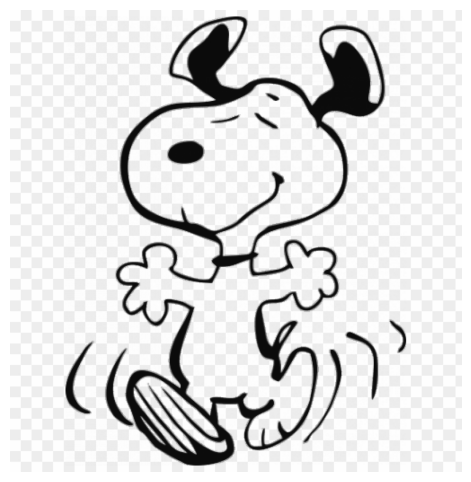

In [2]:
fx_kernel=np.array([[1,-1], [1,-1]]) 
fy_kernel=np.array([[1,1], [-1,-1]])
    
image_name ='snoopy.png'
image = cv2.imread(IMAGES_DIRECTORY + image_name, 0)
show_img(image)



## Convolutional Layer
Uses `torch.nn.Conv2d` to apply a filter (kernel) to the input image. Official documentation for reference: [https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html](https://pytorch.org/docs/stable/generated/torch.nn.functional.conv2d.html)

- Image is a 3-dimensional tensor with shape [height, width, 3], where 3 represents the Red, Green Blue channels.
- Kernel is a small tensor with shape [kernel_height, kernel_width, 3].
- Image and kernel are in Numpy array format.





In [7]:
def torch_convolution(image, kernel):
    # Transforms image and kernel into pytorch tensors which can be fit into torch.nn.Conv2d. 
    # Stores the result of the transformation is in tensor_image and tensor_kernel.
    tensor_image = None
    tensor_kernel = None




    tensor_image = torch.from_numpy(image).permute((2,0,1))
    tensor_image = torch.unsqueeze(tensor_image, 0)
    print(tensor_image.size())
    
    tensor_kernel = torch.from_numpy(kernel)
    tensor_kernel = torch.unsqueeze(tensor_kernel, 0) # ???
    print(tensor_kernel.size())
    
    
    return F.conv2d(input=tensor_image, weight=tensor_kernel, stride=1)

In [8]:
# For debugging, can check the shapes of the tensors by running this
input_images=np.random.randint(low=0, high=256,size=(40,30,3))
print("input_images.shape:",input_images.shape)
input_kernel=np.random.randint(low=0, high=256,size=(3,3,3))
print("input_kernel.shape:",input_kernel.shape)
output=torch_convolution(input_images, input_kernel)
print("output.shape:",output.shape)

input_images.shape: (40, 30, 3)
input_kernel.shape: (3, 3, 3)
torch.Size([1, 3, 40, 30])
torch.Size([1, 3, 3, 3])
output.shape: torch.Size([1, 1, 38, 28])


## ReLU activation function

$$
ReLU(x)=\max(0,x)
$$

If the input is a vector or matrix, the ReLU is applied elementwisely: Assume we have $x\in\mathbb{R}^{n\times m}$

$$
ReLU(x_{i,j})=\max(0,x_{ij}), \text{ for } 1\le i\le n, 1\le j\le m
$$

Officail documentation for reference:
[https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html)


In [10]:
def relu(x):
    m = torch.nn.ReLU()
    return m(x)

In [14]:
# To test relu function implementation:
x=torch.randn(2)
print("the input shape:", x.shape,"input:", x)
output=relu(x)
print("the output shape:", output.shape, "output:",  output)

the input shape: torch.Size([2]) input: tensor([-1.0862, -3.6460])
the output shape: torch.Size([2]) output: tensor([0., 0.])
